# Question 1

Matrix multiplication involves combining elements from a row of the first matrix with elements from a column of the second matrix and then summing the resulting products. For matrices A (with dimensions m x k) and B (with dimensions k x n), when a row of matrix A with k elements is multiplied by a column of matrix B with k elements, this results in k multiplications and k - 1 additions to produce a single element. Given that matrix A has m rows and matrix B has n columns, there will be a total of m * n multiplications of rows and columns. Consequently, this results in m * n * k multiplications and m * n * (k - 1) additions.

#   Question 2

In [1]:
import numpy as np
import timeit

# Get the dimensions of the matrices from the user
n = int(input("Enter the number of rows for the first matrix (n): "))
k = int(input("Enter the number of columns for the first matrix and rows for the second matrix (k): "))
m = int(input("Enter the number of columns for the second matrix (m): "))

# Initialize the matrices with zeros
matrix1 = [[0] * k for _ in range(n)]
matrix2 = [[0] * m for _ in range(k)]
result_matrix = [[0] * m for _ in range(n)]

# Fill in the matrices with user input
for i in range(n):
    matrix1[i] = list(map(int, input().split()))
for i in range(k):
    matrix2[i] = list(map(int, input().split()))

# Measure the time taken to multiply matrices using nested loops
start_time1 = timeit.default_timer()
for i in range(n):
    for j in range(m):
        for a in range(k):
            result_matrix[i][j] += matrix1[i][a] * matrix2[a][j]
end_time1 = timeit.default_timer()

# Print the resulting matrix and the time taken for the nested loops method
print(result_matrix)
time1 = (end_time1 - start_time1) * 10000
print(time1)

# Convert the lists to NumPy arrays
M1 = np.array(matrix1)
M2 = np.array(matrix2)

# Measure the time taken to multiply matrices using NumPy's dot function
start_time2 = timeit.default_timer()
result = np.dot(M1, M2)
end_time2 = timeit.default_timer()

# Print the resulting matrix and the time taken for the NumPy method
print(result)
time2 = (end_time2 - start_time2) * 10000
print(time2)

# Compare and print which method is faster
if time1 < time2:
    print("Multiplying matrices using nested loops is faster.")
else:
    print("Multiplying matrices using NumPy's dot function is faster.")


Enter the number of rows for the first matrix (n): 3
Enter the number of columns for the first matrix and rows for the second matrix (k): 3
Enter the number of columns for the second matrix (m): 3
1 2 3
1 1 1
1 2 4
1 1 1
2 3 4
1 2 3
[[8, 13, 18], [4, 6, 8], [9, 15, 21]]
2.162399999861009
[[ 8 13 18]
 [ 4  6  8]
 [ 9 15 21]]
0.9234199998786607
Multiplying matrices using NumPy's dot function is faster.


# Question 3

In [5]:
import numpy as np

def calculate_median_native(arr):
    # Find the length of the array
    n = len(arr)
    # Use selection sort to partially sort the array until the middle element
    for i in range(n // 2 + 1):
        max_index = i
        for j in range(i + 1, n):
            if arr[j] > arr[max_index]:
                max_index = j
        # Swap the maximum element found with the element at index i
        arr[i], arr[max_index] = arr[max_index], arr[i]
    # Check if the number of elements is even
    if n % 2 == 0:
        return (arr[n // 2] + arr[n // 2 - 1]) / 2
    else:
        return arr[n // 2]

def calculate_median_with_sorting(arr):
    # Sort the array
    arr.sort()
    n = len(arr)
    # Check if the number of elements is even
    if n % 2 == 0:
        return (arr[n // 2] + arr[n // 2 - 1]) / 2
    else:
        return arr[n // 2]

# Take input and convert to a NumPy array of floats
arr = input("Enter numbers separated by spaces: ").split()
arr = np.array(arr).astype(float)

# Calculate medians using two methods
median1 = calculate_median_native(arr.copy())
median2 = calculate_median_with_sorting(arr)

# Print the results
print("Native Median:", median1)
print("Median using sorting:", median2)


Enter numbers separated by spaces: 1 2 3 4 5
Native Median: 3.0
Median using sorting: 3.0


# Question 4

The equation is \( f(x, y) = x^2 * y + y^3 \sin(x) \).

the partial derivatives:

\begin{align}
    \frac{\partial f}{\partial x} &= 2x*y + y^3 \cos(x) \\
    \frac{\partial f}{\partial y} &= x^2 + 3y^2 \sin(x)
\end{align}

So, the gradient is given by:

\begin{equation}
    \nabla f(x, y) = \begin{bmatrix}
        2x*y + y^3 \cos(x) \\
        x^2 + 3y^2 \sin(x)
    \end{bmatrix}
\end{equation}

# Question 5

In [ ]:
import jax
import jax.numpy as jnp
from jax import random

# Initialize a random key
key = random.PRNGKey(0)

# Define a function with two arguments
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Compute the gradient of the function with respect to both arguments
gradient_f = jax.grad(f, argnums=(0, 1))

# Define a list of angles in degrees
angles_deg = [0.0, 45.0, 90.0]

# Evaluate the gradient at three random pairs of (x, y)
for _ in range(3):
    x = random.uniform(key, (), minval=0.0, maxval=1.0)
    y = random.uniform(key, (), minval=0.0, maxval=1.0)
    print(f"At (x, y) = ({x}, {y}), the gradient is {gradient_f(x, y)}")

# Convert the angles from degrees to radians
angles_rad = [jnp.radians(angle) for angle in angles_deg]

# Evaluate and print the gradient at the specified angles with y fixed at 1.0
for angle_rad in angles_rad:
    print(f"At x = {angle_rad} radians, the gradient is {gradient_f(angle_rad, 1.0)}")

At (x, y) = (0.41845703125, 0.41845703125), the gradient is (Array(0.41716468, dtype=float32), Array(0.3885702, dtype=float32))
At (x, y) = (0.41845703125, 0.41845703125), the gradient is (Array(0.41716468, dtype=float32), Array(0.3885702, dtype=float32))
At (x, y) = (0.41845703125, 0.41845703125), the gradient is (Array(0.41716468, dtype=float32), Array(0.3885702, dtype=float32))
At x = 0.0 radians, the gradient is (Array(1., dtype=float32, weak_type=True), Array(0., dtype=float32, weak_type=True))
At x = 0.7853981852531433 radians, the gradient is (Array(2.277903, dtype=float32, weak_type=True), Array(2.7381706, dtype=float32, weak_type=True))
At x = 1.5707963705062866 radians, the gradient is (Array(3.1415927, dtype=float32, weak_type=True), Array(5.4674015, dtype=float32, weak_type=True))


# Question 6

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

# f(x, y) = x^2*y + y^3*sin(x)
f = x**2 * y + y**3 * sp.sin(x)

# partial derivative of f with respect to x
df_dx = sp.diff(f, x)

# partial derivative of f with respect to y
df_dy = sp.diff(f, y)

print("Partial derivative with respect to x:", df_dx)
print("Partial derivative with respect to y:", df_dy)


Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)


# Question 7

In [ ]:
def show_records(data):
    for year, branches in data.items():
        print(year)
        for branch, student in branches.items():
            print(f'  {branch}')
            print(f'    Roll Number: {student["Roll Number"]}, Name: {student["Name"]}')
            print(f'    Marks:')
            for subject, score in student["Marks"].items():
                print(f'      {subject}: {score}')


students_data = {
    2022: {
        'Branch1': {
            'Roll Number': 15,
            'Name': 'Kanchana',
            'Marks': {
                'Maths': 10,
                'Physics': 50
            }
        },
        'Branch2': {
            'Roll Number': 16,
            'Name': 'Bahu',
            'Marks': {
                'Maths': 81,
                'Physics': 69
            }
        }
    },
    2023: {
        'Branch1': {
            'Roll Number': 31,
            'Name': 'Cimran',
            'Marks': {
                'Telugu': 91,
                'English': 56
            }
        },
        'Branch2': {
            'Roll Number': 32,
            'Name': 'Doney',
            'Marks': {
                'Telugu': 100,
                'English': 88
            }
        }
    },
    2024: {
        'Branch1': {
            'Roll Number': 45,
            'Name': 'Eswar',
            'Marks': {
                'Economics': 96,
                'Commerce': 95
            }
        },
        'Branch2': {
            'Roll Number': 46,
            'Name': 'Fraz',
            'Marks': {
                'Economics': 90,
                'Commerce': 100
            }
        }
    },
    2025: {
        'Branch1': {
            'Roll Number': 61,
            'Name': 'Guna',
            'Marks': {
                'Biology': 81,
                'Zoology': 85
            }
        },
        'Branch2': {
            'Roll Number': 62,
            'Name': 'Hari',
            'Marks': {
                'Biology': 10,
                'Zoology': 79
            }
        }
    }
}

# Display the student records
show_records(students_data)


2022
  Branch1
    Roll Number: 15, Name: Kanchana
    Marks:
      Maths: 10
      Physics: 50
  Branch2
    Roll Number: 16, Name: Bahu
    Marks:
      Maths: 81
      Physics: 69
2023
  Branch1
    Roll Number: 31, Name: Cimran
    Marks:
      Telugu: 91
      English: 56
  Branch2
    Roll Number: 32, Name: Doney
    Marks:
      Telugu: 100
      English: 88
2024
  Branch1
    Roll Number: 45, Name: Eswar
    Marks:
      Economics: 96
      Commerce: 95
  Branch2
    Roll Number: 46, Name: Fraz
    Marks:
      Economics: 90
      Commerce: 100
2025
  Branch1
    Roll Number: 61, Name: Guna
    Marks:
      Biology: 81
      Zoology: 85
  Branch2
    Roll Number: 62, Name: Hari
    Marks:
      Biology: 10
      Zoology: 79


# Question 8

# Question 9

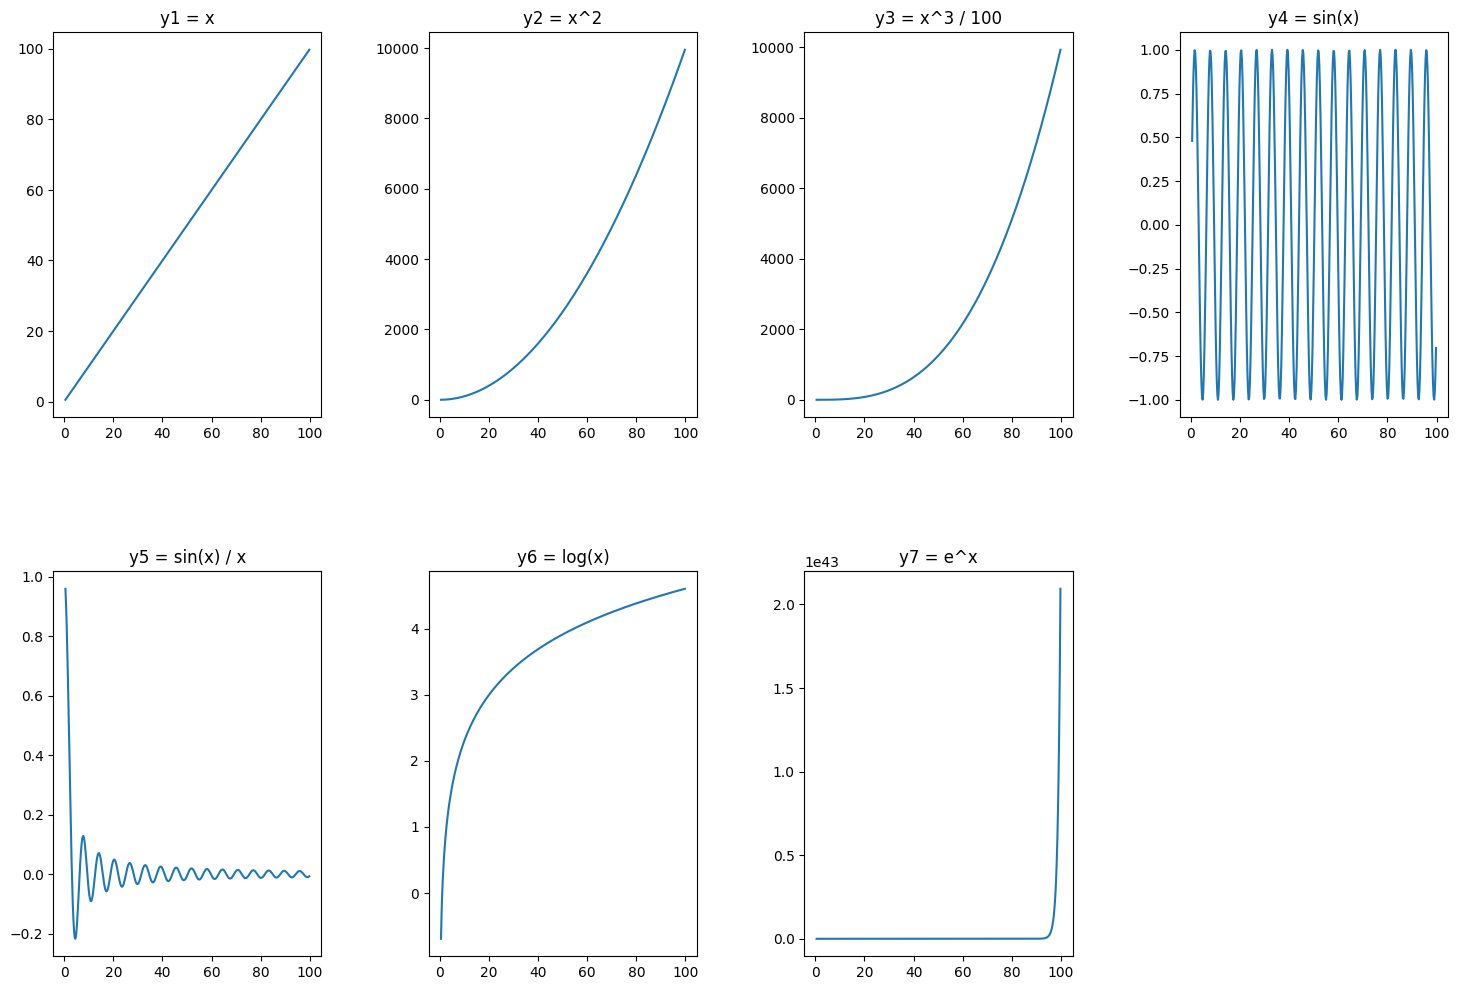

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x values ranging from 0.5 to 100 with increments of 0.5
x = np.arange(0.5, 100, 0.25)

# Define the y values for each function
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create a figure and specify its size
plt.figure(figsize=(18, 12))

# Plot y1 = x in the first subplot
plt.subplot(2, 4, 1)
plt.plot(x, y1)
plt.title('y1 = x')

# Plot y2 = x^2 in the second subplot
plt.subplot(2, 4, 2)
plt.plot(x, y2)
plt.title('y2 = x^2')

# Plot y3 = x^3 / 100 in the third subplot
plt.subplot(2, 4, 3)
plt.plot(x, y3)
plt.title('y3 = x^3 / 100')

# Plot y4 = sin(x) in the fourth subplot
plt.subplot(2, 4, 4)
plt.plot(x, y4)
plt.title('y4 = sin(x)')

# Plot y5 = sin(x) / x in the fifth subplot
plt.subplot(2, 4, 5)
plt.plot(x, y5)
plt.title('y5 = sin(x) / x')

# Plot y6 = log(x) in the sixth subplot
plt.subplot(2, 4, 6)
plt.plot(x, y6)
plt.title('y6 = log(x)')

# Plot y7 = e^x in the seventh subplot
plt.subplot(2, 4, 7)
plt.plot(x, y7)
plt.title('y7 = e^x')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plots
plt.show()


# Question 10

In [ ]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers ranging from 1 to 2
matrix = np.random.uniform(1, 2, (20, 5))

# Create a DataFrame with the matrix, specifying column names
df = pd.DataFrame(matrix, columns=['a    ', ' b    ', ' c    ', ' d   ', 'e    '])

# Print the DataFrame
print(df)

# Determine and print the column with the highest standard deviation
print("The column with the highest standard deviation is:", df.std().idxmax())

# Determine and print the row with the lowest mean
print("The row with the lowest mean is:", df.mean(axis=1).idxmin())



       a         b         c          d        e    
0   1.267443  1.337460  1.477156  1.076818  1.726000
1   1.216768  1.704329  1.250262  1.262085  1.222907
2   1.432275  1.325110  1.689398  1.273048  1.839992
3   1.261565  1.260944  1.528306  1.073205  1.018368
4   1.651806  1.515876  1.189812  1.074769  1.970608
5   1.301872  1.792747  1.540366  1.043978  1.868993
6   1.193699  1.731548  1.805203  1.604855  1.459244
7   1.461146  1.697043  1.377013  1.537543  1.403086
8   1.575944  1.856172  1.610441  1.758682  1.509396
9   1.159607  1.994136  1.741699  1.779920  1.720094
10  1.247022  1.406832  1.408590  1.620344  1.557010
11  1.592244  1.550894  1.564361  1.860455  1.276779
12  1.072057  1.626460  1.144884  1.845607  1.489691
13  1.939329  1.811266  1.077805  1.203389  1.638444
14  1.312365  1.406074  1.644119  1.118880  1.456579
15  1.244070  1.045806  1.705143  1.099744  1.897550
16  1.503977  1.048234  1.166519  1.004080  1.233488
17  1.699174  1.845198  1.285842  1.333237  1.

# Question 11

In [ ]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix with random numbers within the range 1 to 2
matrix = np.random.uniform(1, 2, (20, 5))

# Create a DataFrame with the generated matrix
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Add a new column 'f' which is the sum of the columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df.sum(axis=1)

# Add another column 'g' where the value is 'LT8' if the value in column 'f' is less than 8, otherwise 'GT8'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Print the DataFrame
print(df)

# Find and print the number of rows where the value in column 'g' is 'LT8'
lt8_count = len(df[df['g'] == 'LT8'])
print("Number of rows where 'g' is 'LT8':", lt8_count)

# Find and print the standard deviation of column 'f' for rows where the value in column 'g' is 'LT8' and 'GT8' respectively
lt8_std = df[df['g'] == 'LT8']['f'].std()
gt8_std = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of 'f' where 'g' is 'LT8':", lt8_std)
print("Standard deviation of 'f' where 'g' is 'GT8':", gt8_std)



           a         b         c         d         e         f    g
0   1.767368  1.481382  1.905906  1.270108  1.071921  7.496685  LT8
1   1.881266  1.360483  1.487607  1.261978  1.223137  7.214472  LT8
2   1.720497  1.953407  1.701095  1.272968  1.606848  8.254815  GT8
3   1.235418  1.581493  1.320849  1.278301  1.777229  7.193289  LT8
4   1.816284  1.651286  1.975329  1.266223  1.657499  8.366620  GT8
5   1.566604  1.198158  1.541366  1.439460  1.743840  7.489429  LT8
6   1.003330  1.563753  1.485393  1.712523  1.592262  7.357261  LT8
7   1.393185  1.799148  1.841072  1.289819  1.336282  7.659506  LT8
8   1.833802  1.268853  1.041050  1.629172  1.208839  6.981715  LT8
9   1.037387  1.914477  1.026524  1.502949  1.425300  6.906637  LT8
10  1.559687  1.283311  1.715395  1.374213  1.599839  7.532445  LT8
11  1.367607  1.222055  1.708732  1.008462  1.392463  6.699320  LT8
12  1.054357  1.754220  1.900727  1.750874  1.209240  7.669419  LT8
13  1.808946  1.016502  1.567959  1.862568  1.37

# Question 12

In [ ]:
import numpy as np

# Define a one-dimensional array
a = np.array([1, 2, 3])

# Define a two-dimensional array
b = np.array([[1, 2, 3], [4, 5, 6]])

# Use broadcasting to add the arrays together
c = a + b

print("One-dimensional array a:")
print(a)

print("\nTwo-dimensional array b:")
print(b)

print("\nResult of the broadcasting addition (a + b):")
print(c)

One-dimensional array a:
[1 2 3]

Two-dimensional array b:
[[1 2 3]
 [4 5 6]]

Result of the broadcasting addition (a + b):
[[2 4 6]
 [5 7 9]]


# Question 13

In [2]:
import numpy as np

def find_argmin(array):
    # Initialize the index and minimum value
    min_index = 0
    min_value = array[0]

    # Iterate through the array to find the minimum value and its index
    for i in range(1, len(array)):
        if array[i] < min_value:
            min_value = array[i]
            min_index = i

    return min_index

user_input = input("Enter elements separated by spaces: ")
numpy_array = np.array(list(map(float, user_input.split())))


custom_index = find_argmin(numpy_array)


numpy_index = np.argmin(numpy_array)

print("Index of the minimum element in the array is", custom_index)
if custom_index == numpy_index:
    print("Both methods give the same index for the minimum element.")
else:
    print("The indices obtained from the two methods are different.")


Enter elements separated by spaces: 2 3 4 5 6
Index of the minimum element in the array is 0
Both methods give the same index for the minimum element.
